# COVID19 evolution analysis

#### data loading

In [110]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tools
import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
df_naz = pd.read_csv('../external_data/ProtezioneCivile/COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv').drop('stato',1)
reg = pd.read_csv('../external_data/ProtezioneCivile/COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')
prov = pd.read_csv('../external_data/ProtezioneCivile/COVID-19/dati-province/dpc-covid19-ita-province.csv').drop('stato',1)
df_naz.index = pd.to_datetime(df_naz.index)
reg['data'] = pd.to_datetime(reg['data'])
prov['data'] = pd.to_datetime(prov['data'])
df_world_confirmed = pd.read_csv('../external_data/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_world_deaths = pd.read_csv('../external_data/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_world_recovered = pd.read_csv('../external_data/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_naz = tools.add_extra_features(df_naz)
regions = reg.groupby('denominazione_regione')
df_reg = {}
for item in regions.groups:
    df_reg[item] = tools.add_extra_features(regions.get_group(item)).replace((np.inf, np.nan), 0)
provinces = prov.groupby('sigla_provincia')
df_prov = pd.DataFrame()
for item in provinces.groups:
    df_prov = pd.concat((df_prov,tools.add_extra_features(provinces.get_group(item)).replace((np.inf, np.nan), 0)),0)

## Italy

### diffusion heatmap for provinces

In [112]:
col = 'totale_casi'
fig = px.density_mapbox(df_prov[df_prov.index==df_prov.index.max()], 
                        lat='lat', lon='long', z=col, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        #animation_frame=df_prov[df_prov.index==df_prov.index.max()].index,
                        mapbox_style="stamen-terrain",
                        title = col + ' on ' + str(df_prov.index.max()))
fig.show()

In [113]:
col = '%delta_totale_casi'
fig = px.density_mapbox(df_prov[df_prov.index==df_prov.index.max()], 
                        lat='lat', lon='long', z=col, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        #animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain",
                        title = col + ' on ' + str(df_prov.index.max()))
fig.show()

### National evolution

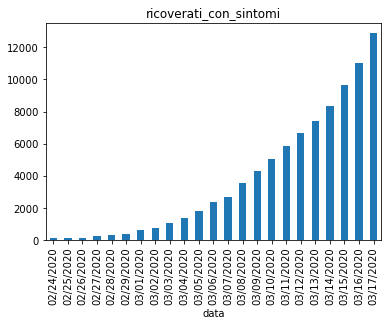

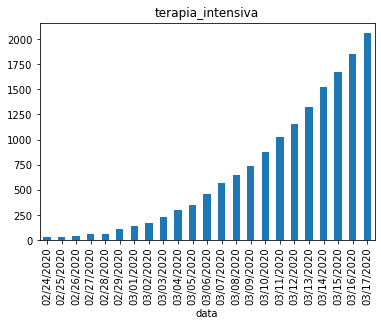

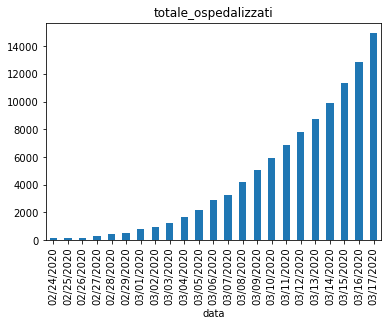

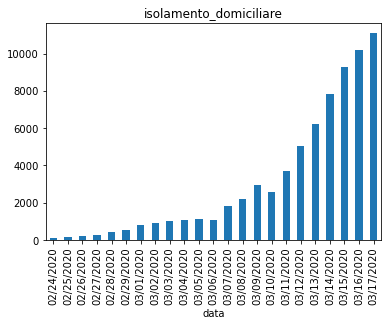

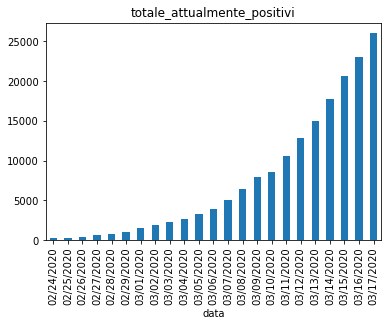

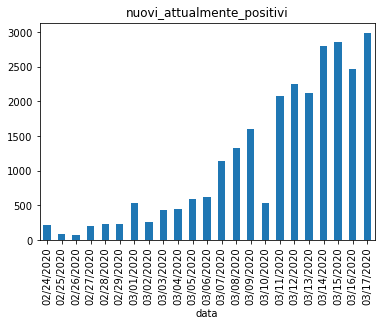

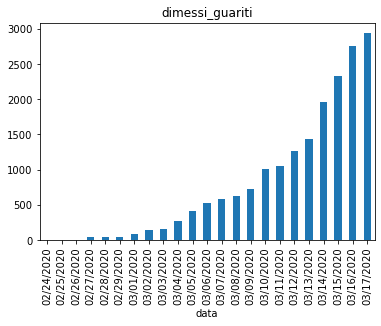

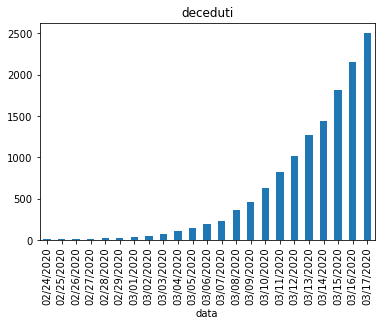

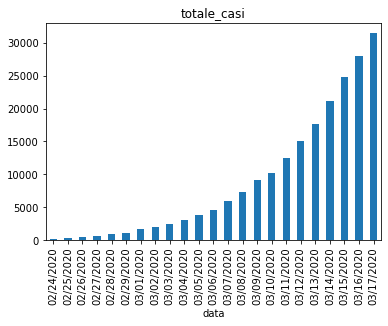

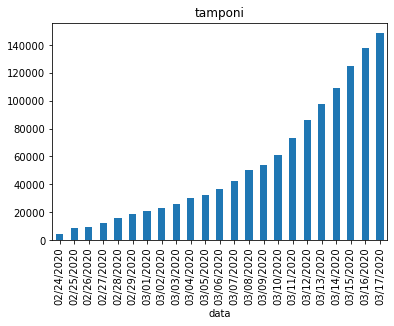

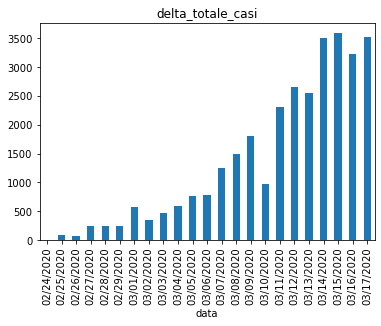

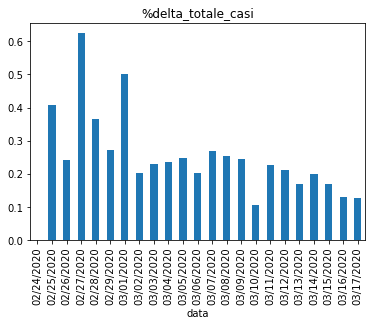

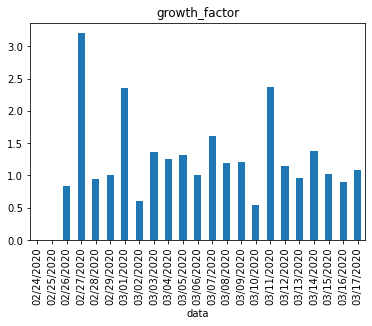

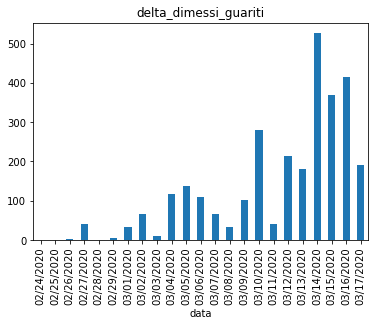

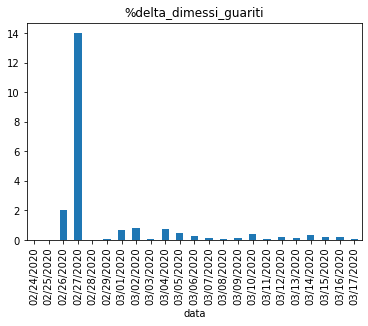

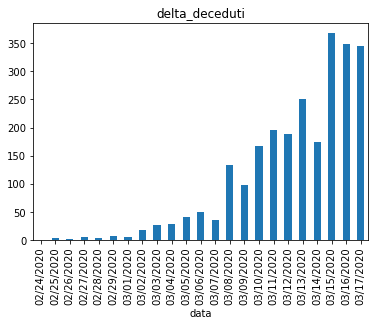

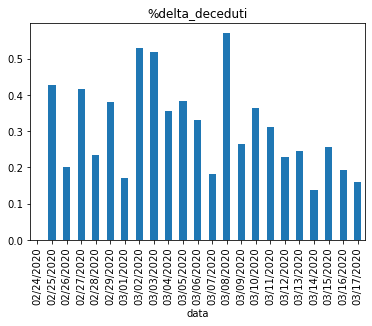

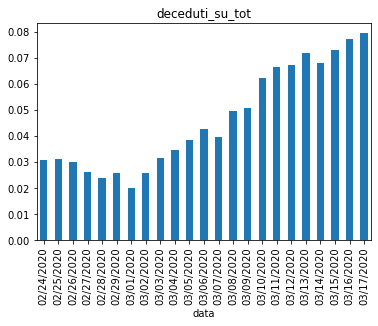

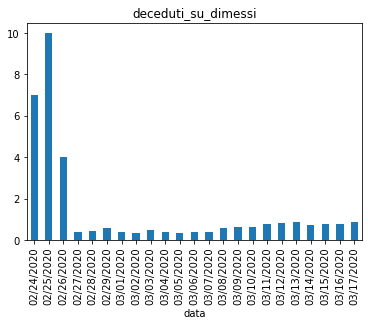

In [114]:
for col in df_naz.columns:
    plt.figure()
    df_naz[col].plot(kind='bar', title=col)    

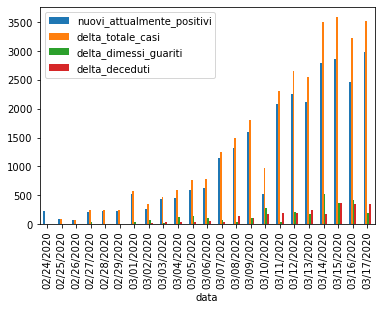

In [115]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].plot(kind='bar')

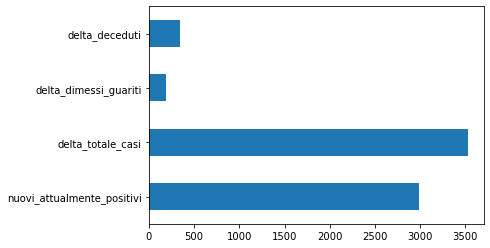

In [116]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].iloc[-1].plot(kind='barh')

Text(0.5, 1.0, "variazione giornaliera nuovi casi per l'Abruzzo")

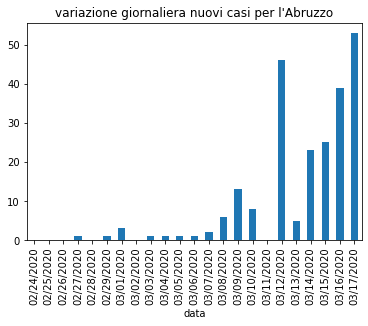

In [117]:
df_reg['Abruzzo']['delta_totale_casi'].plot(kind='bar')
plt.title("variazione giornaliera nuovi casi per l'Abruzzo")

### Logistic model evolution

### National Analysis

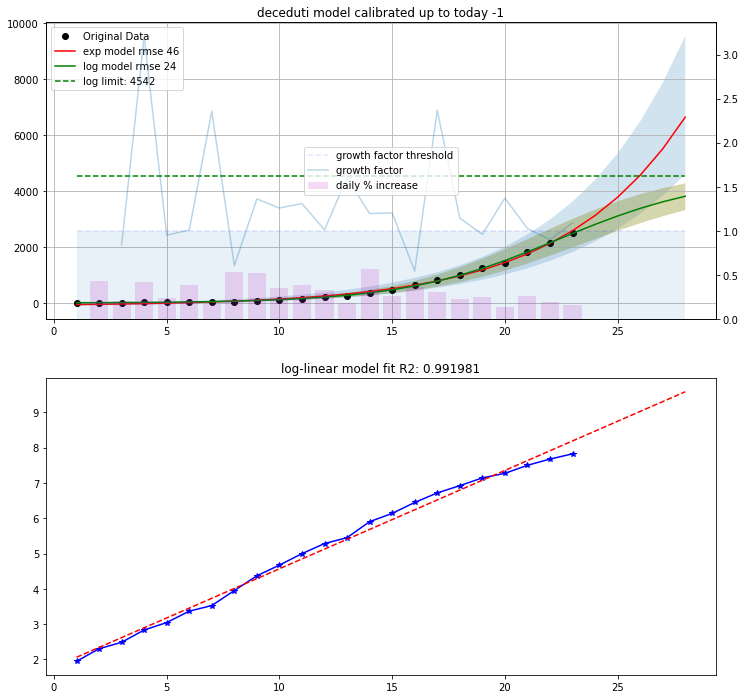

next day prediction for log model:  2809
next day prediction for exp model:  3128
data
03/13/2020    1266
03/14/2020    1441
03/15/2020    1809
03/16/2020    2158
03/17/2020    2503
Name: deceduti, dtype: int64


In [118]:
tools.plot_model(df_naz, 'deceduti', backward_fit=-1, forward_look=5, plotlimit=True, show_pol=False)

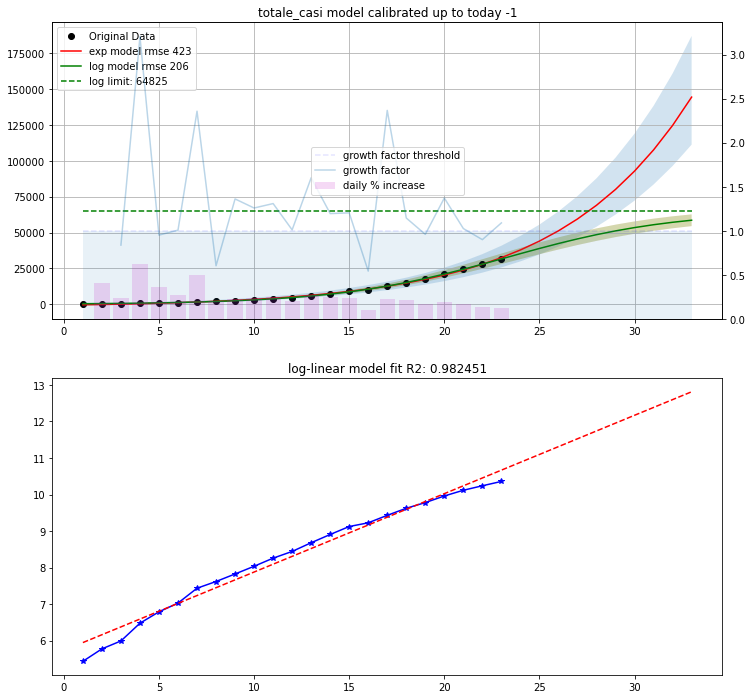

next day prediction for log model:  35302
next day prediction for exp model:  37860
data
03/13/2020    17660
03/14/2020    21157
03/15/2020    24747
03/16/2020    27980
03/17/2020    31506
Name: totale_casi, dtype: int64


In [119]:
tools.plot_model(df_naz, 'totale_casi', backward_fit=-1, forward_look=10, plotlimit=True, show_pol=False)

### Regional Analysis

In [133]:
df_reg['Lombardia'].iloc[-2:]

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,...,tamponi,delta_totale_casi,%delta_totale_casi,growth_factor,delta_dimessi_guariti,%delta_dimessi_guariti,delta_deceduti,%delta_deceduti,deceduti_su_tot,deceduti_su_dimessi
data,,,,,,,,,,,,,,,,,,,,,
03/16/2020,ITA,3,Lombardia,45.466794,9.190347,6171,823,6994,3867,10861,...,43565,1377.0,0.103752,0.867675,357.0,0.177524,202.0,0.165846,0.096935,0.599662
03/26/2020,ITA,3,Lombardia,45.466794,9.190347,6953,879,7832,4263,12095,...,46449,1571.0,0.107243,1.140886,117.0,0.049409,220.0,0.154930,0.101110,0.659960


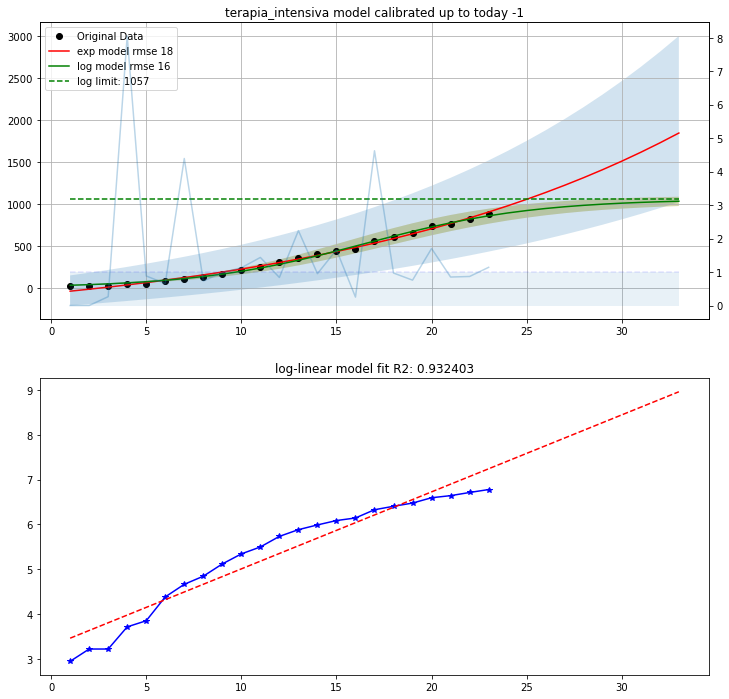

next day prediction for log model:  893
next day prediction for exp model:  978
data
03/13/2020    650
03/14/2020    732
03/15/2020    767
03/16/2020    823
03/26/2020    879
Name: terapia_intensiva, dtype: int64


In [120]:
tools.plot_model(df_reg['Lombardia'], 'terapia_intensiva', backward_fit=-1, forward_look=10, plotlimit=True, 
                 show_pol=False, show_exp=True)

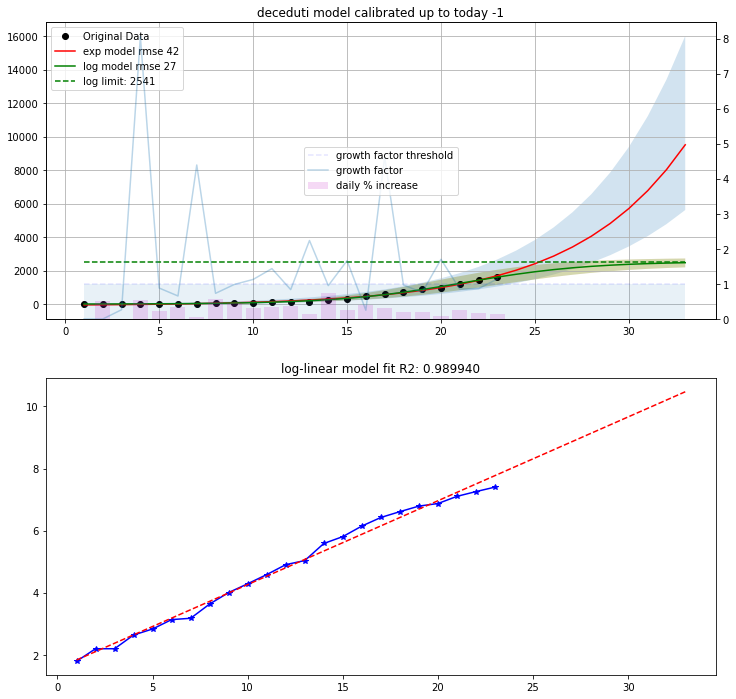

next day prediction for log model:  1779
next day prediction for exp model:  2021
data
03/13/2020     890
03/14/2020     966
03/15/2020    1218
03/16/2020    1420
03/26/2020    1640
Name: deceduti, dtype: int64


In [131]:
tools.plot_model(df_reg['Lombardia'], 'deceduti', backward_fit=-1, forward_look=10, plotlimit=True, 
                 show_pol=False, show_exp=True)

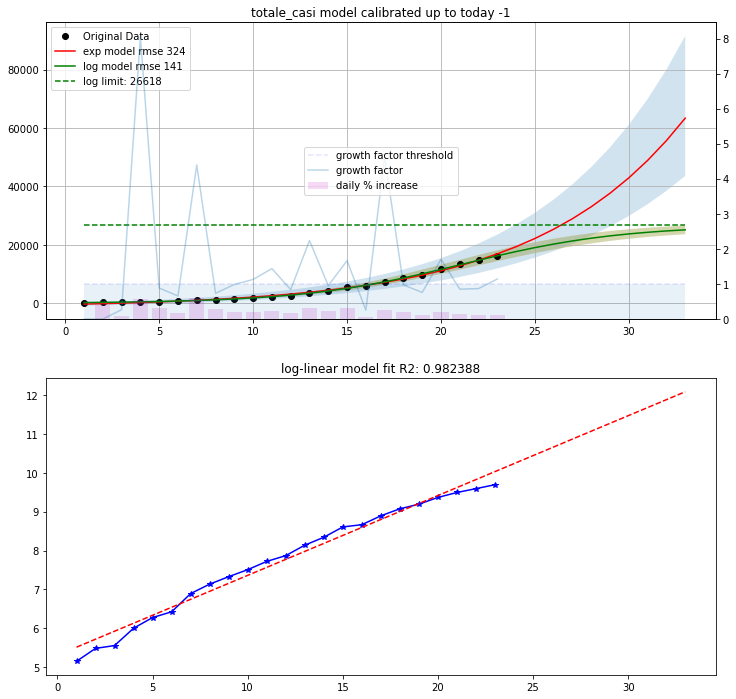

next day prediction for log model:  17693
next day prediction for exp model:  19367
data
03/13/2020     9820
03/14/2020    11685
03/15/2020    13272
03/16/2020    14649
03/26/2020    16220
Name: totale_casi, dtype: int64


In [121]:
tools.plot_model(df_reg['Lombardia'], 'totale_casi', backward_fit=-1, forward_look=10, plotlimit=True, 
                 show_pol=False, show_exp=True)

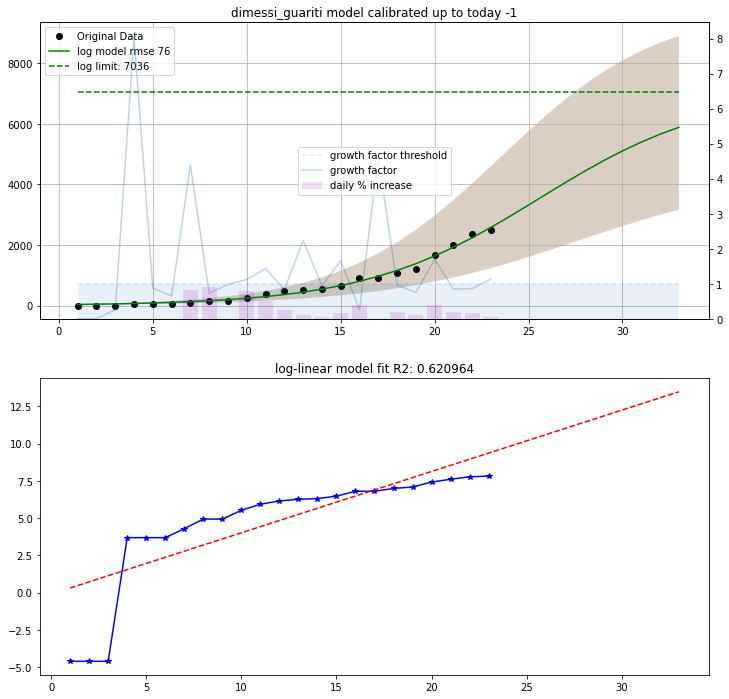

next day prediction for log model:  2942
data
03/13/2020    1198.0
03/14/2020    1660.0
03/15/2020    2011.0
03/16/2020    2368.0
03/26/2020    2485.0
Name: dimessi_guariti, dtype: float64


In [122]:
tools.plot_model(df_reg['Lombardia'].replace(0,0.01), 'dimessi_guariti', backward_fit=-1, forward_look=10, plotlimit=True, 
                 show_pol=False, show_exp=False)

### Lombardy evolution for provinces

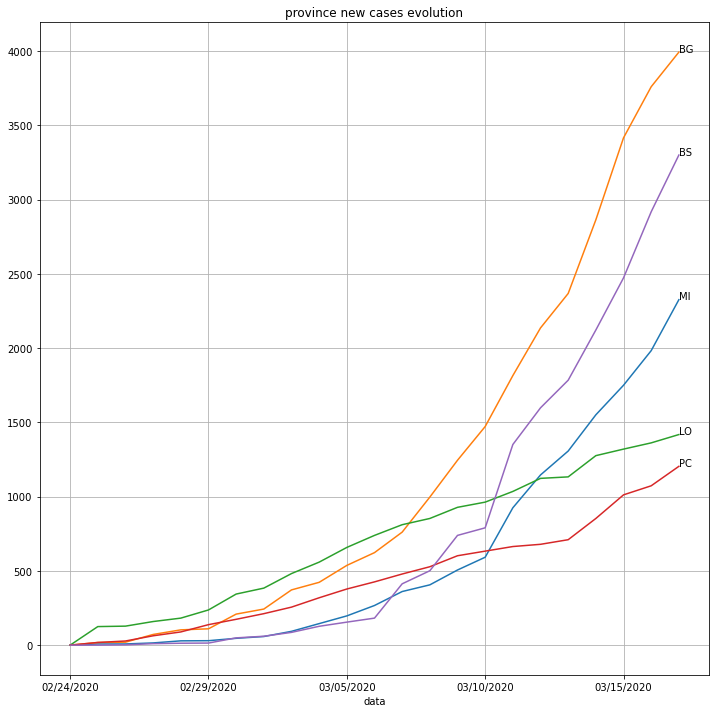

In [123]:
prov_analysis = df_prov.reset_index().pivot_table(index='data', columns='sigla_provincia', 
            values='totale_casi')[['MI', 'BG', 'LO', 'PC', 'BS']]
prov_analysis.plot(kind='line', figsize=(12,12), legend=False)
for label in ['MI', 'BG', 'LO', 'PC', 'BS']:
    plt.annotate(label, xy=(len(prov_analysis)-1, prov_analysis[label].iloc[-1]), textcoords='data')
plt.title('province new cases evolution')
plt.grid()


### china comparison

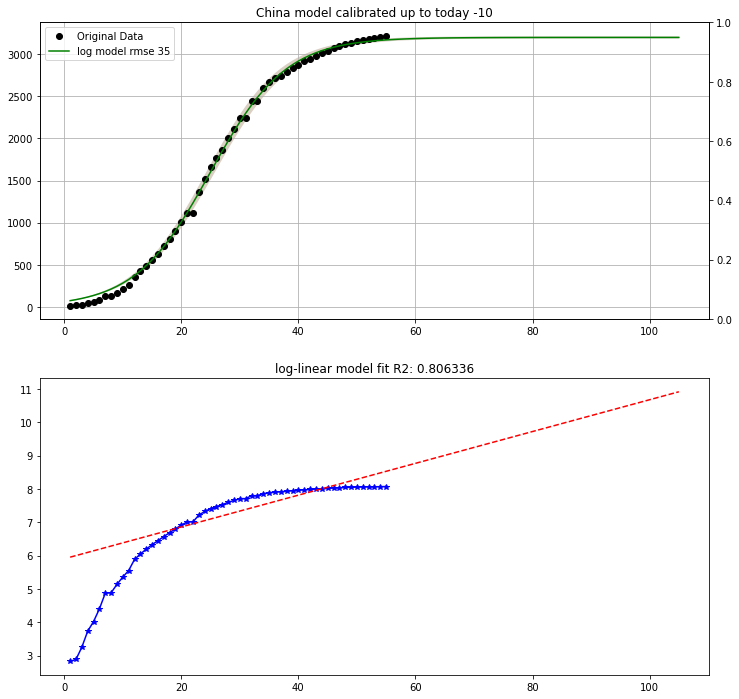

next day prediction for log model:  3174
2020-03-12    3172
2020-03-13    3180
2020-03-14    3193
2020-03-15    3203
2020-03-16    3217
Name: China, dtype: int64


In [124]:
china_deaths = df_world_deaths[df_world_deaths['Country/Region']=='China'].groupby('Country/Region').sum().drop('Lat',1).drop('Long',1).T#
china_deaths.index = pd.to_datetime(china_deaths.index)
tools.plot_model(china_deaths, 'China', backward_fit=-10, forward_look=50, plotlimit=False, show_pol=False, show_exp=False)

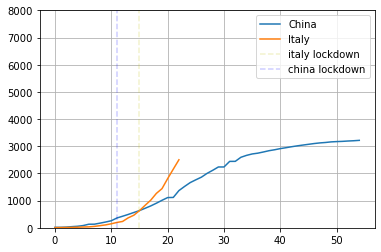

In [125]:
df_compare = pd.DataFrame(data=pd.concat([china_deaths.reset_index(drop=True), df_naz['deceduti'].reset_index(drop=True)], 
                            axis=1))
df_compare.columns = ['China','Italy']
df_compare.plot()
plt.ylim(0,8000)
plt.grid()
plt.axvline(x=15, label='italy lockdown', alpha=0.2, color='y', linestyle='--')
plt.axvline(x=11, label='china lockdown', alpha=0.2, color='b', linestyle='--')
plt.legend()

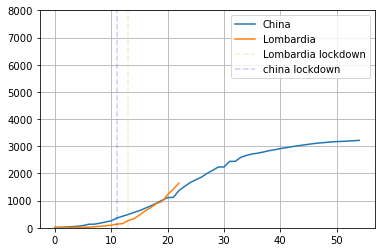

In [126]:
df_compare = pd.DataFrame(data=pd.concat([china_deaths.reset_index(drop=True), 
                    df_reg['Lombardia']['deceduti'].reset_index(drop=True)], axis=1))
df_compare.columns = ['China','Lombardia']
df_compare.plot()
plt.ylim(0,8000)
plt.grid()
plt.axvline(x=13, label='Lombardia lockdown', alpha=0.2, color='y', linestyle='--')
plt.axvline(x=11, label='china lockdown', alpha=0.2, color='b', linestyle='--')
plt.legend()

### simulation using Facebook Phrophet Model

In [127]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\anaconda3\envs\coronavirus\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Traceback (most recent call last):
  File "c:\anaconda3\envs\coronavirus\lib\site-packages\matplotlib\axis.py", line 1573, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "c:\anaconda3\envs\coronavirus\lib\site-packages\matplotlib\category.py", line 61, in convert
    unit.update(values)
  File "c:\

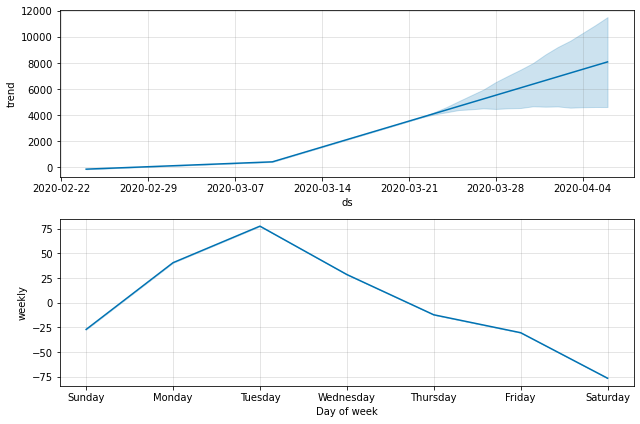

ValueError: view limit minimum -7.930656e+16 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

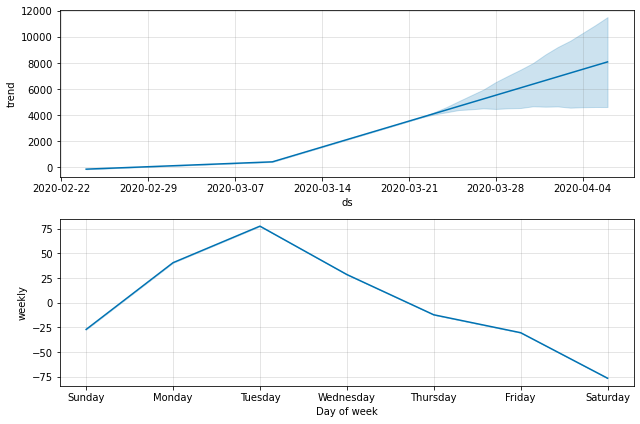

In [128]:

y = 'deceduti'
train_data = pd.DataFrame()
train_data['ds']=df_naz.index
train_data['y']=df_naz[y].reset_index(drop=True).values
growth = 'linear'
cap = 4000
floor = 0
if growth=='logistic':
    train_data['cap'] = cap
    train_data['floor'] = floor

m = Prophet(growth = growth, changepoints=['2020-03-10'], changepoint_prior_scale=0.75)
m.fit(train_data)
future = m.make_future_dataframe(periods=20)
if growth=='logistic':
    future['cap'] = cap
    future['floor'] = floor
forecast = m.predict(future)
fig = m.plot(forecast)

a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('prophet forecast for ' + y)
plt.plot(train_data.set_index('ds')['y'],'r*',label='actual data')
#plt.axvspan(whole_data.iloc[0]['ds'], train_data.iloc[-1]['ds'], alpha=0.15, color='red', label='train period')
#plt.axvspan(test_data.iloc[0]['ds'], test_data.iloc[-1]['ds'], alpha=0.15, color='green', label='test period')
plt.legend()
m.plot_components(forecast)
